In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
y_train[0:20]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6]], dtype=uint8)

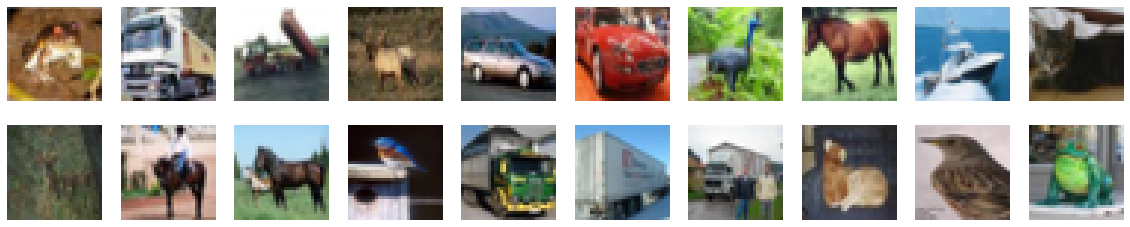

In [6]:
plt.figure(figsize=(20, 4))
index = 0
for image in x_train[0:20,:,:,:]:
    index += 1
    plt.subplot(2, 10, index)
    plt.imshow(image)
    plt.axis("off")

plt.show()

In [11]:
# simple ELU model

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for n_hidden in range(20):
    model.add(keras.layers.Dense(100, activation="elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

n_epochs = 100
#history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))
history = model.fit(x_train, y_train, epochs=n_epochs, validation_split=0.3,
                    callbacks= [early_stopping_cb])

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 20s 570us/sample - loss: 2.0692 - accuracy: 0.2409 - val_loss: 1.9204 - val_accuracy: 0.2995
Epoch 2/100
35000/35000 [==============================] - 20s 562us/sample - loss: 1.8695 - accuracy: 0.3215 - val_loss: 1.8420 - val_accuracy: 0.3384
Epoch 3/100
35000/35000 [==============================] - 21s 597us/sample - loss: 1.7951 - accuracy: 0.3514 - val_loss: 1.7877 - val_accuracy: 0.3593
Epoch 4/100
35000/35000 [==============================] - 21s 596us/sample - loss: 1.7481 - accuracy: 0.3712 - val_loss: 1.7476 - val_accuracy: 0.3716
Epoch 5/100
35000/35000 [==============================] - 19s 550us/sample - loss: 1.7103 - accuracy: 0.3828 - val_loss: 1.7227 - val_accuracy: 0.3801
Epoch 6/100
35000/35000 [==============================] - 20s 574us/sample - loss: 1.6813 - accuracy: 0.3970 - val_loss: 1.7096 - val_accuracy: 0.3846
Epoch 7/100
35000/35000 [=============

In [12]:
ELU_ev = model.evaluate(x_test, y_test,verbose=2)

10000/1 - 1s - loss: 1.5254 - accuracy: 0.4510


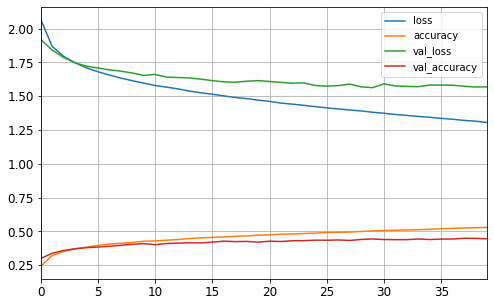

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [5]:
# batch normalization model

modelB = keras.models.Sequential()

modelB.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
modelB.add(keras.layers.BatchNormalization())
for n_hidden in range(20):
    modelB.add(keras.layers.Dense(100, activation="elu"))
    modelB.add(keras.layers.BatchNormalization())
modelB.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
modelB.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

n_epochs = 100
#history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))
historyB = modelB.fit(x_train, y_train, epochs=n_epochs, validation_split=0.3,
                    callbacks= [early_stopping_cb])


Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 57s 2ms/sample - loss: 2.0044 - accuracy: 0.2837 - val_loss: 1.7816 - val_accuracy: 0.3591
Epoch 2/100
35000/35000 [==============================] - 46s 1ms/sample - loss: 1.7633 - accuracy: 0.3661 - val_loss: 1.6697 - val_accuracy: 0.4037
Epoch 3/100
35000/35000 [==============================] - 53s 2ms/sample - loss: 1.6927 - accuracy: 0.3939 - val_loss: 1.6046 - val_accuracy: 0.4310
Epoch 4/100
35000/35000 [==============================] - 56s 2ms/sample - loss: 1.6271 - accuracy: 0.4186 - val_loss: 1.5647 - val_accuracy: 0.4423
Epoch 5/100
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.5827 - accuracy: 0.4339 - val_loss: 1.5373 - val_accuracy: 0.4535
Epoch 6/100
35000/35000 [==============================] - 56s 2ms/sample - loss: 1.5494 - accuracy: 0.4479 - val_loss: 1.5205 - val_accuracy: 0.4625
Epoch 7/100
35000/35000 [=========================

In [6]:
Batch_ev = modelB.evaluate(x_test, y_test,verbose=2)

10000/1 - 2s - loss: 1.5323 - accuracy: 0.5144


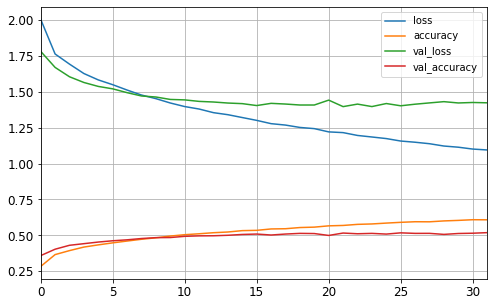

In [7]:
pd.DataFrame(historyB.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [7]:
# SELU model

modelS = keras.models.Sequential()

modelS.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for n_hidden in range(20):
    modelS.add(keras.layers.Dense(100, activation="selu",kernel_initializer="lecun_normal"))
modelS.add(keras.layers.Dense(10, activation="softmax"))


optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
modelS.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
     
n_epochs = 100
#history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

# scale inputs
pixel_means = x_train.mean(axis=(0), keepdims=True)
pixel_stds = x_train.std(axis=(0), keepdims=True)
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds


historyS = modelS.fit(x_train_scaled, y_train, epochs=n_epochs, validation_split=0.3,
                    callbacks= [early_stopping_cb])


Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 34s 966us/sample - loss: 1.8626 - accuracy: 0.3325 - val_loss: 1.7406 - val_accuracy: 0.3831
Epoch 2/100
35000/35000 [==============================] - 32s 914us/sample - loss: 1.6498 - accuracy: 0.4123 - val_loss: 1.6478 - val_accuracy: 0.4137
Epoch 3/100
35000/35000 [==============================] - 33s 956us/sample - loss: 1.5436 - accuracy: 0.4520 - val_loss: 1.5974 - val_accuracy: 0.4361
Epoch 4/100
35000/35000 [==============================] - 35s 1ms/sample - loss: 1.4701 - accuracy: 0.4768 - val_loss: 1.5628 - val_accuracy: 0.4447
Epoch 5/100
35000/35000 [==============================] - 34s 979us/sample - loss: 1.4083 - accuracy: 0.4985 - val_loss: 1.5470 - val_accuracy: 0.4557
Epoch 6/100
35000/35000 [==============================] - 35s 997us/sample - loss: 1.3482 - accuracy: 0.5206 - val_loss: 1.5324 - val_accuracy: 0.4612
Epoch 7/100
35000/35000 [===============

In [8]:
SELU_ev = modelS.evaluate(x_test_scaled, y_test,verbose=2)

10000/1 - 2s - loss: 1.5657 - accuracy: 0.4774


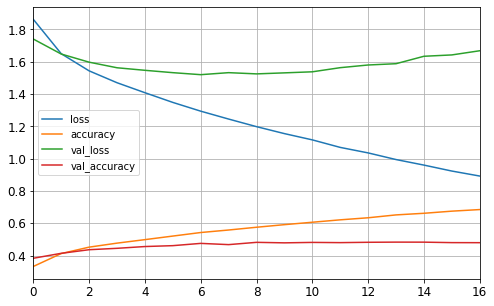

In [9]:
pd.DataFrame(historyS.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()